Code to get professor data

In [131]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time



In [138]:
csv = 'Resources/faculty_researcher_ids.csv'
iddf = pd.read_csv(csv,index_col=0)

iddf = iddf[['NAME','Scopus_ID']]
iddf

,NAME,Scopus_ID
SL.NO,,
1,Dr. Pooja .M.R,5.719039e+10
2,Dr. K. Paramesha,5.705341e+10
3,Dr. C Balarengadurai,5.720478e+10
4,Dr. Aditya C R,5.721644e+10
5,Dr. Natesh. M,5.721649e+10
6,Dr. Ramakrishna Hegde,5.624246e+10
7,Dr. Janhavi.V,5.719080e+10
8,Dr. Ayesha Taranum,5.721661e+10
9,Dr. Prasad M R,5.649222e+10


Make a list of all URL

In [149]:
# Author_id= []
# 
# for id in iddf['Scopus_ID']:
#     Author_id.append(id) 
# Author_id
# Create an empty dictionary to store name-ID pairs
author_id= {}
for index, row in iddf.iterrows():
    try:
        # Handle various numeric types
        if pd.notna(row['Scopus_ID']):
            # Convert to int, handling float, int, string representations
            scopus_id = int(float(str(row['Scopus_ID']).replace('.0', '')))
            author_id[row['NAME']] = scopus_id
    except Exception as e:
        print(f"Conversion error for {row['NAME']}: {e}")

# If you want a list of tuples
author_list = list(author_id.items())

author_list


[('Dr. Pooja .M.R', 57190388894),
 ('Dr. K. Paramesha', 57053407100),
 ('Dr. C Balarengadurai', 57204777085),
 ('Dr. Aditya C R', 57216440090),
 ('Dr. Natesh. M', 57216492647),
 ('Dr. Ramakrishna Hegde', 56242461400),
 ('Dr. Janhavi.V', 57190803068),
 ('Dr. Ayesha Taranum', 57216610861),
 ('Dr. Prasad M R', 56492215200),
 ('Shraddha .C', 57215538430),
 ('Dr. Chethana  H T', 57216492613),
 ('Dr. Divya C D', 56584466200),
 ('Sachin D N', 57207254227),
 ('Nithin Kumar', 57209158237),
 ('Shashank N', 57219547732),
 ('Harshitha K', 57215871380),
 ('Chaya Kumari H A', 57212135510),
 ('Anusha K S', 57225657708),
 ('Swathi B H', 57215871749),
 ('Tanuja K', 57222076412),
 ('Pruthvi P R', 0),
 ('Manasvi J Maasthi', 57215872514),
 ('Akshatha M', 19),
 ('Lakshmi B S', 3),
 ('Dr. Madhusudhan H S', 57249954500),
 ('Dr. Vedavathi N', 57223995588),
 ('Anil Kumar B H', 58849651900),
 ('Harshitha Suresh', 0)]

Alternate way to get author info if default doesn't work

In [150]:

def get_author_info_alternative(author_id, api_key):
    """
    Alternative method using Abstract API
    """
   
    url = f"https://api.elsevier.com/content/abstract/scopus_id/{author_id}"
    headers = {
        "X-ELS-APIKey": api_key,
        "Accept": "application/json",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"
    }

    try:
        response = requests.get(url, headers=headers)
        print(f"Alternative API Response Status: {response.status_code}")
        if response.status_code == 200:
            print("\nDebug - Alternative API Response:")
            print(json.dumps(response.json(), indent=2)[:1000])
    except Exception as e:
        print(f"Error with alternative approach: {e}")

       

Get Author Documents

In [151]:

def get_documents_by_author(author_id, api_key):
    """
    Fetch documents using Scopus Search API
    """
   
    
    base_url = "https://api.elsevier.com/content/search/scopus"
    headers = {
        "X-ELS-APIKey": api_key,
        "Accept": "application/json",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"
    }
    
    all_documents = []
    start = 0
    count = 25  # Number of results per request
    
    while True:
        params = {
            "query": f"AU-ID({author_id})",
            "start": start,
            "count": count,
            "sort": "coverDate"
        }
        
        try:
            response = requests.get(base_url, headers=headers, params=params)
            # print(f"Documents API Response Status: {response.status_code} for start={start}")
            
            if response.status_code == 200:
                data = response.json()
                results = data['search-results']
                
                if 'entry' not in results or not results['entry']:
                    break
                    
                all_documents.extend(results['entry'])
                
                # Check if we've got all results
                total_results = int(results['opensearch:totalResults'])
                if start + count >= total_results:
                    break
                    
                start += count
                time.sleep(1)  # Add delay to avoid hitting rate limits
            else:
                print(f"Error response content: {response.text}")
                break
                
        except Exception as e:
            print(f"Error fetching documents: {e}")
            break
    
    return all_documents

Get Author publication with graph

In [157]:
def authorinfo_and_visualize(name,author_id,api_key,documents):
    """
    Analyze document data print author details and visualizations
    """

    
    if not documents:
        print("No documents to analyze")
        return
    
    # Create a DataFrame
    data = []
    for doc in documents:
        try:
            year = datetime.strptime(doc.get('prism:coverDate', ''), '%Y-%m-%d').year
            title = doc.get('dc:title', 'No title')
            source = doc.get('prism:publicationName', 'Unknown')
            citations = int(doc.get('citedby-count', 0))
            
            data.append({
                'year': year,
                'title': title,
                'source': source,
                'citations': citations
            })
        except (ValueError, KeyError) as e:
            print(f"Error processing document: {e}")
            continue
    
    df = pd.DataFrame(data)
   
    """
    Fetch author information using Scopus Search API with detailed debugging
    """
    base_url = "https://api.elsevier.com/content/search/scopus"
    headers = {
        "X-ELS-APIKey": api_key,
        "Accept": "application/json",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"
    }
    
    params = {
        "query": f"AU-ID({author_id})",
        "field": "dc:title,author,dc:creator",  # Request specific fields
        "count": 1
    }
        
    try:
        response = requests.get(base_url, headers=headers, params=params)
        
        if response.status_code == 200:
            data = response.json()
            
            # Get total number of documents
            total_docs = data['search-results'].get('opensearch:totalResults', 'N/A')
            
            # Try to get author name from the first document
            author_name = "Name not found"
            if 'entry' in data['search-results'] and data['search-results']['entry']:
                entry = data['search-results']['entry'][0]
                
                # Try different possible locations for author information
                if 'dc:creator' in entry:
                    author_name = name
                    # author_name = entry['dc:creator']
                
                
                elif 'author' in entry:
                    for author in entry['author']:
                        if str(author.get('authid')) == author_id:
                            # author_name = f"{author.get('given-name', '')} {author.get('surname', '')}".strip()
                            author_name = name
                            break
            #printing authors information and publications   
            print("\nAuthor Information:")
            print("-" * 50)
            print(f"Name: {author_name}")
            print(f"Scopus Author ID: {author_id}")
            print(f"Total Documents Published: {total_docs}")
            print(f"Publication year range: {df['year'].min()} - {df['year'].max()}")
            print(f"Total citations: {df['citations'].sum()}")
            print("-" * 50)
            
            # If name still not found, try alternative approach
            if author_name == "Name not found":
                print("\nTrying alternative API endpoint...")
                get_author_info_alternative(author_id, api_key)
                
        else:
            print(f"Error: Could not fetch data. Status code: {response.status_code}")
            print(f"Response content: {response.text[:500]}...")
            
    except Exception as e:
        print(f"An error occurred: {e}")

    
    
     # Create publications per year plot
    plt.figure(figsize=(12, 6))
    year_counts = df['year'].value_counts().sort_index()
    year_counts.plot(kind='bar')
    plt.title('Publications by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
        


Author Information:
--------------------------------------------------
Name: Dr. Pooja .M.R
Scopus Author ID: 57190388894
Total Documents Published: 31
Publication year range: 2016 - 2024
Total citations: 60
--------------------------------------------------


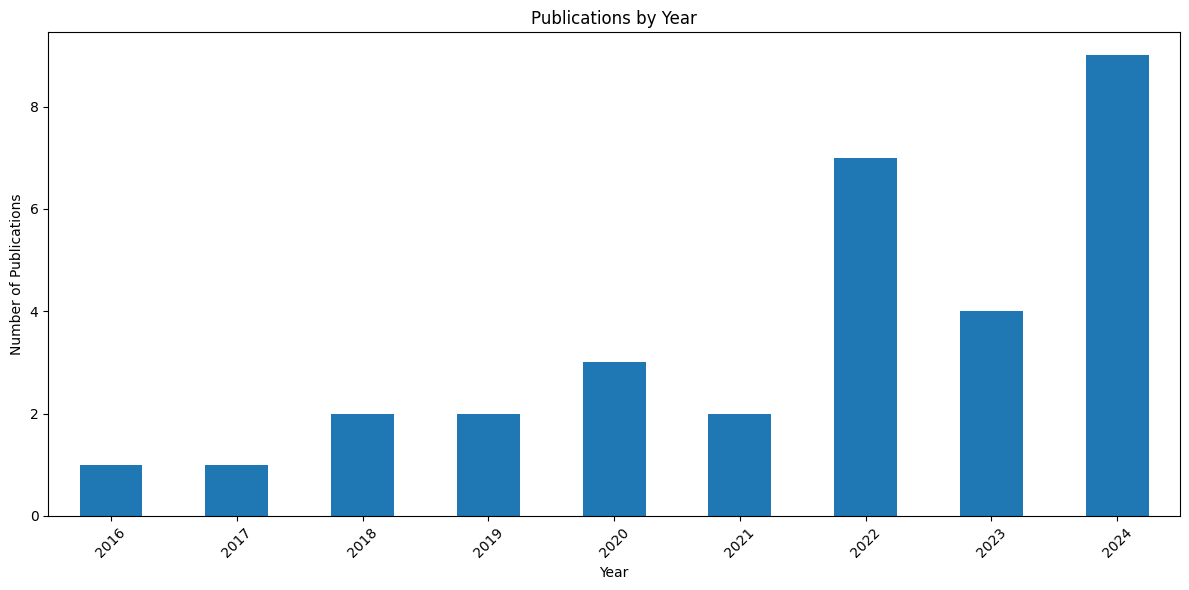


Author Information:
--------------------------------------------------
Name: Dr. K. Paramesha
Scopus Author ID: 57053407100
Total Documents Published: 8
Publication year range: 2015 - 2024
Total citations: 33
--------------------------------------------------


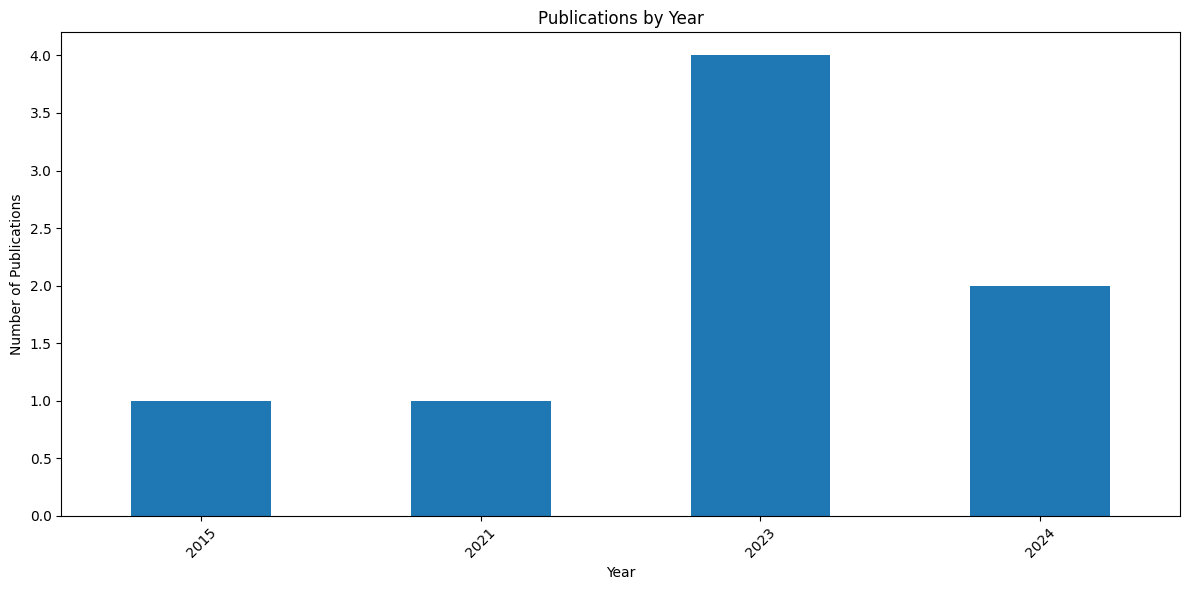


Author Information:
--------------------------------------------------
Name: Dr. C Balarengadurai
Scopus Author ID: 57204777085
Total Documents Published: 22
Publication year range: 2012 - 2024
Total citations: 70
--------------------------------------------------


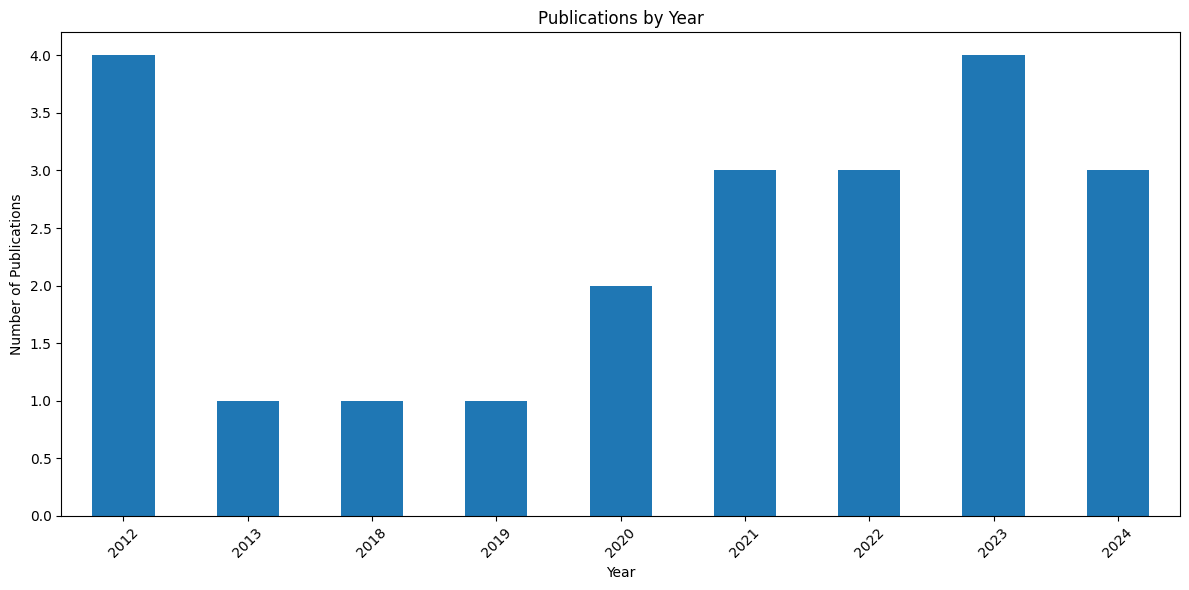


Author Information:
--------------------------------------------------
Name: Dr. Aditya C R
Scopus Author ID: 57216440090
Total Documents Published: 13
Publication year range: 2017 - 2023
Total citations: 42
--------------------------------------------------


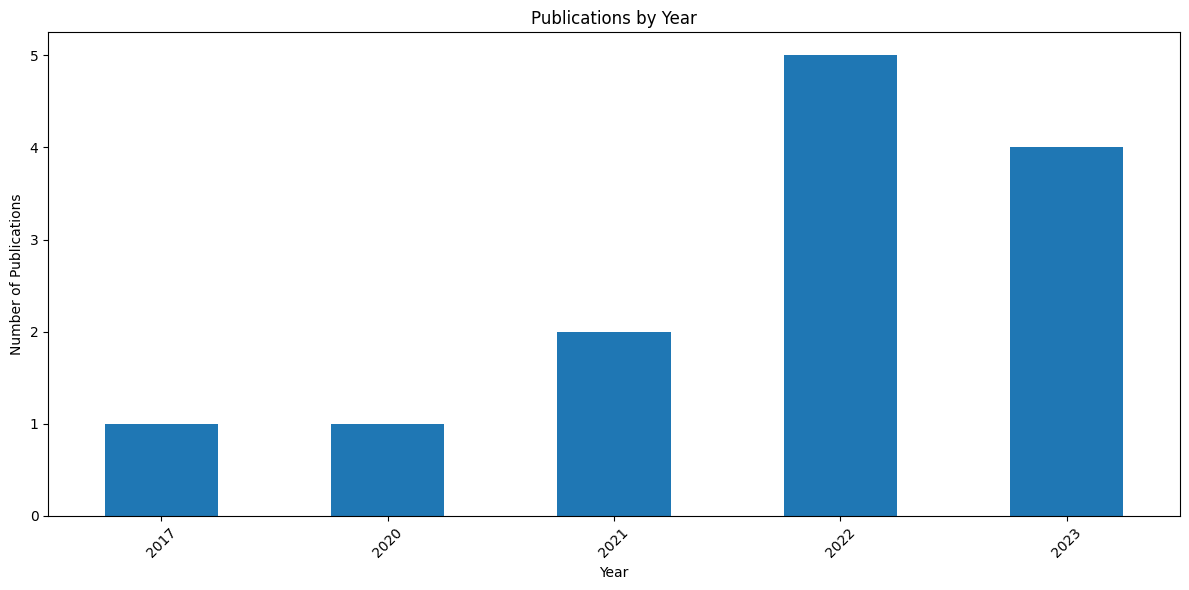


Author Information:
--------------------------------------------------
Name: Dr. Natesh. M
Scopus Author ID: 57216492647
Total Documents Published: 11
Publication year range: 2020 - 2024
Total citations: 54
--------------------------------------------------


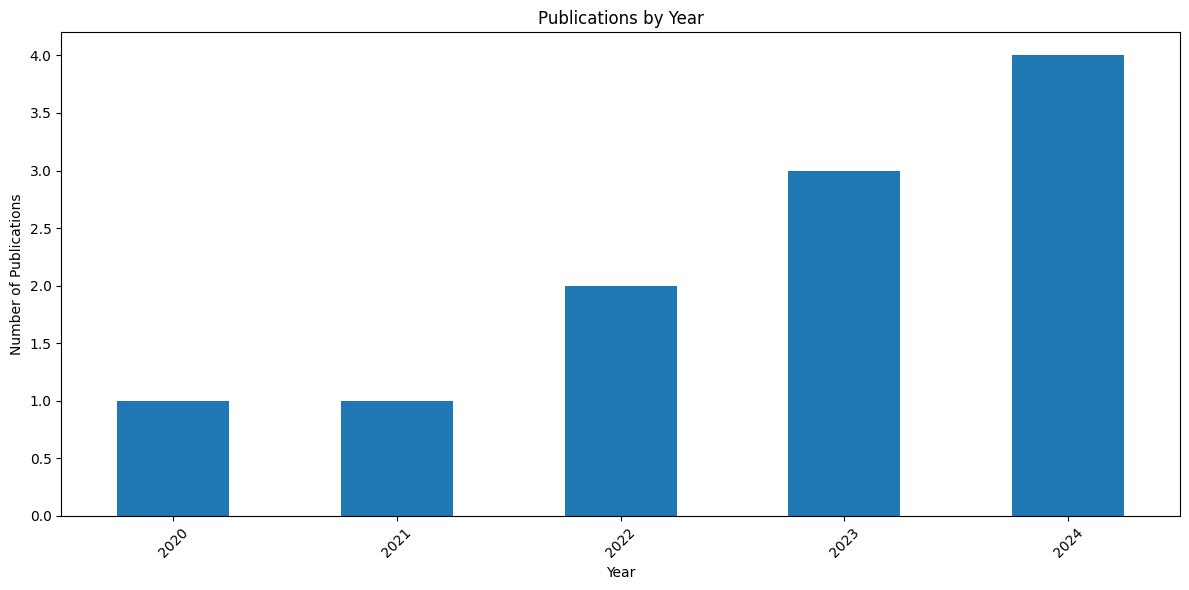


Author Information:
--------------------------------------------------
Name: Dr. Ramakrishna Hegde
Scopus Author ID: 56242461400
Total Documents Published: 16
Publication year range: 2013 - 2024
Total citations: 70
--------------------------------------------------


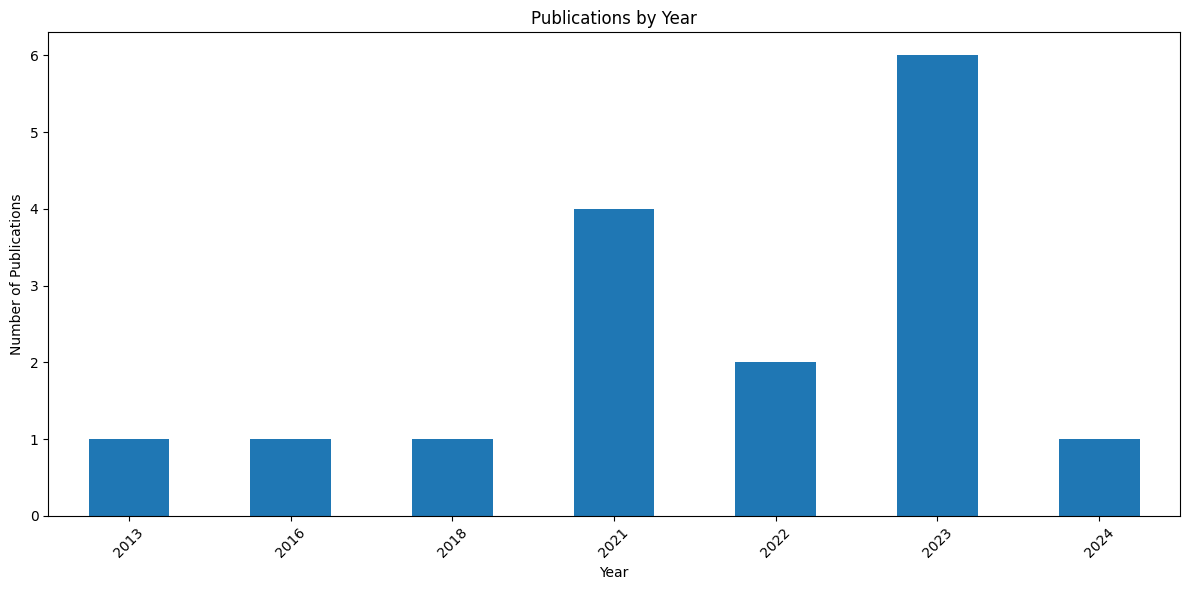


Author Information:
--------------------------------------------------
Name: Dr. Janhavi.V
Scopus Author ID: 57190803068
Total Documents Published: 18
Publication year range: 2014 - 2024
Total citations: 39
--------------------------------------------------


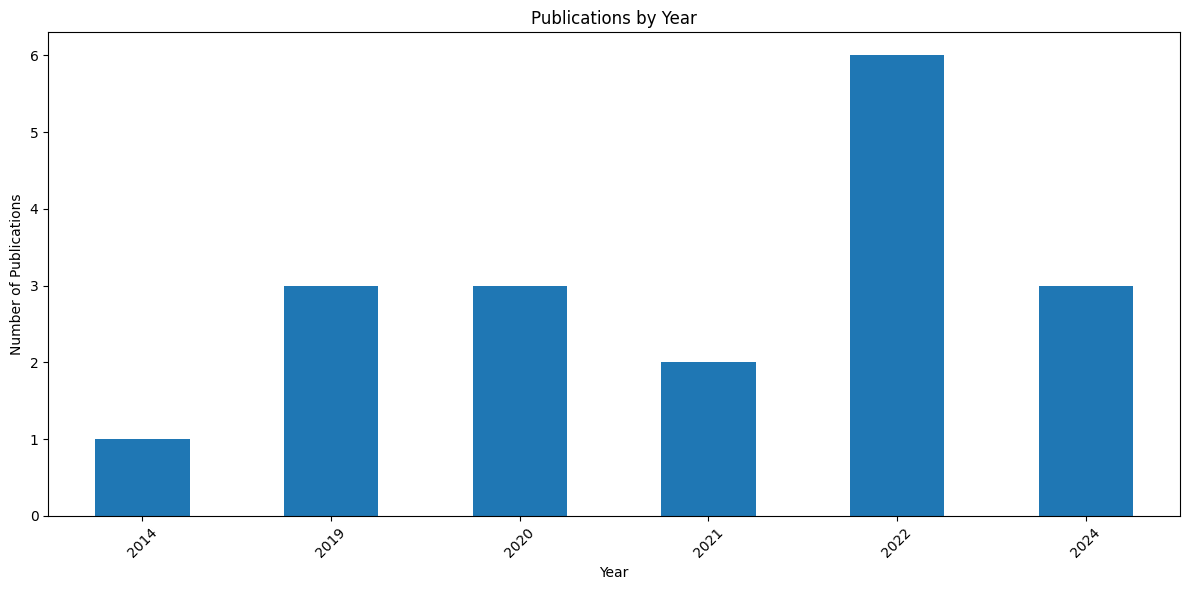


Author Information:
--------------------------------------------------
Name: Dr. Ayesha Taranum
Scopus Author ID: 57216610861
Total Documents Published: 6
Publication year range: 2019 - 2025
Total citations: 3
--------------------------------------------------


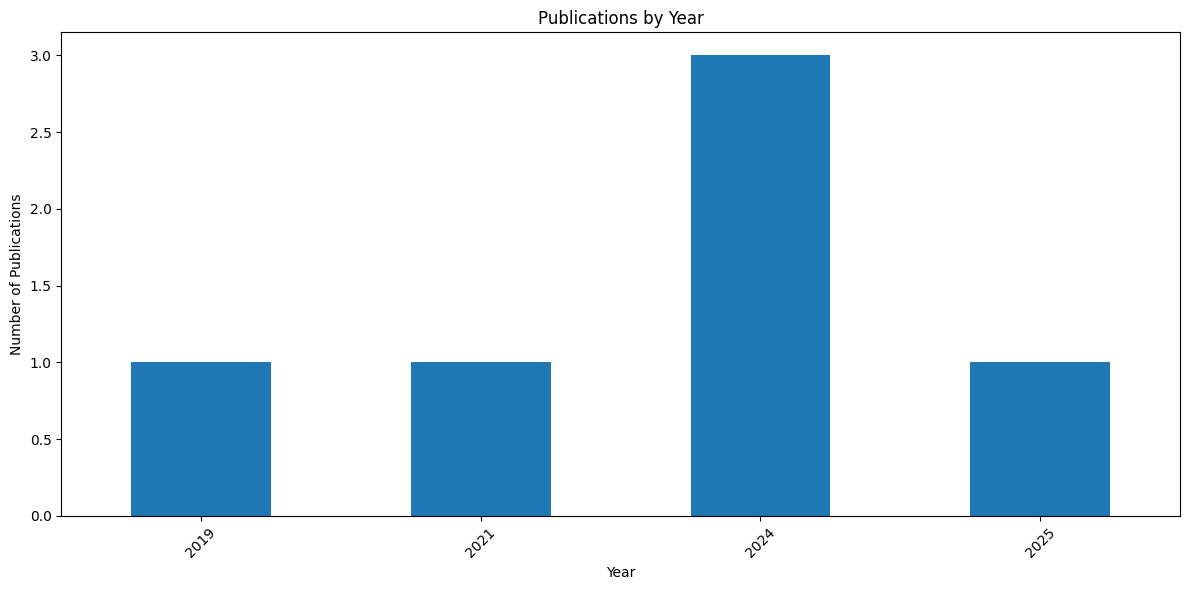


Author Information:
--------------------------------------------------
Name: Dr. Prasad M R
Scopus Author ID: 56492215200
Total Documents Published: 10
Publication year range: 2014 - 2024
Total citations: 6
--------------------------------------------------


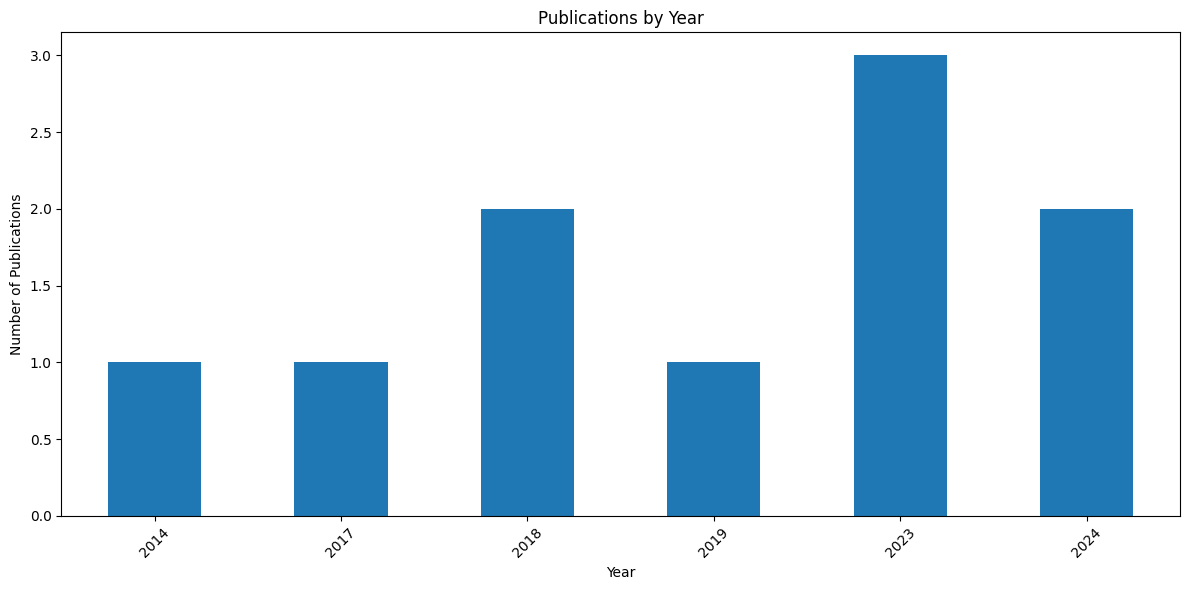


Author Information:
--------------------------------------------------
Name: Shraddha .C
Scopus Author ID: 57215538430
Total Documents Published: 5
Publication year range: 2019 - 2024
Total citations: 12
--------------------------------------------------


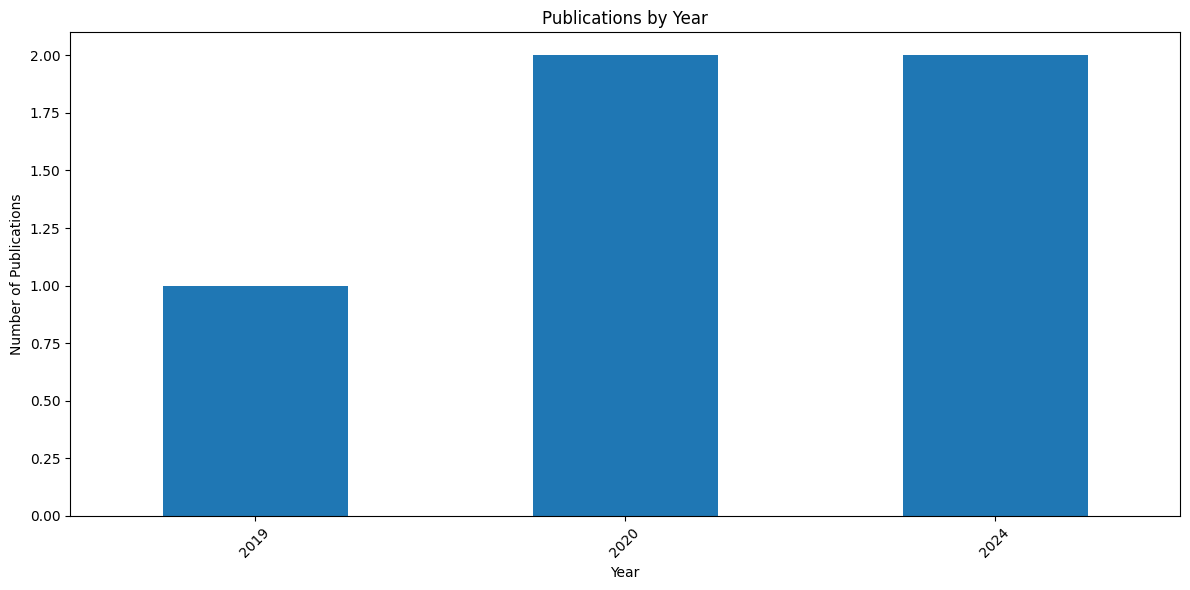


Author Information:
--------------------------------------------------
Name: Dr. Chethana  H T
Scopus Author ID: 57216492613
Total Documents Published: 12
Publication year range: 2020 - 2024
Total citations: 9
--------------------------------------------------


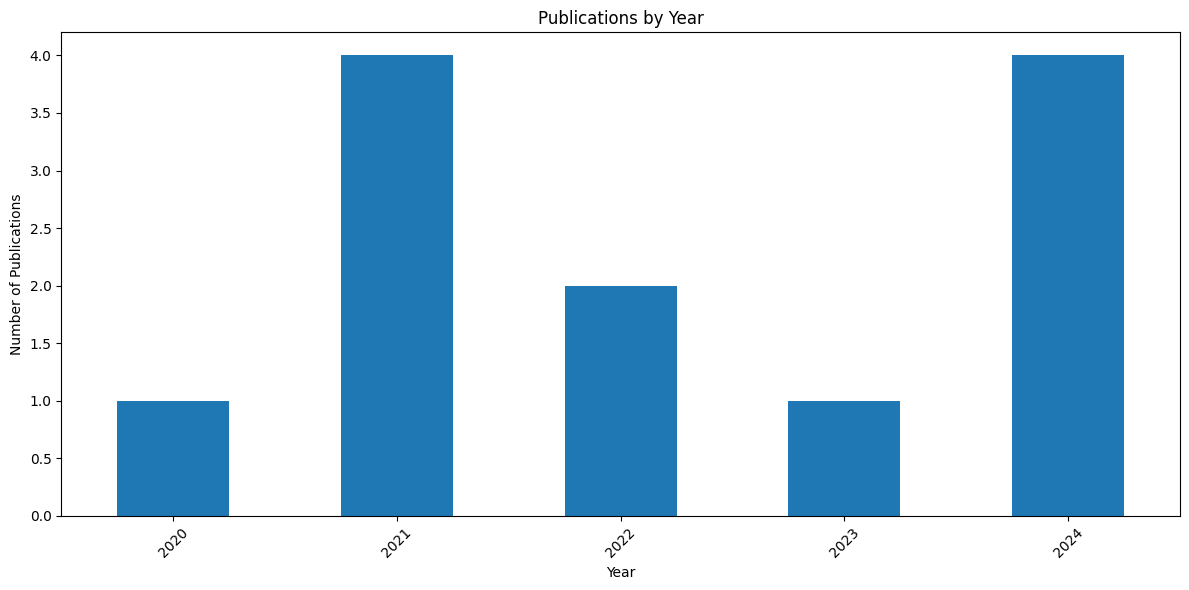


Author Information:
--------------------------------------------------
Name: Dr. Divya C D
Scopus Author ID: 56584466200
Total Documents Published: 12
Publication year range: 2020 - 2024
Total citations: 29
--------------------------------------------------


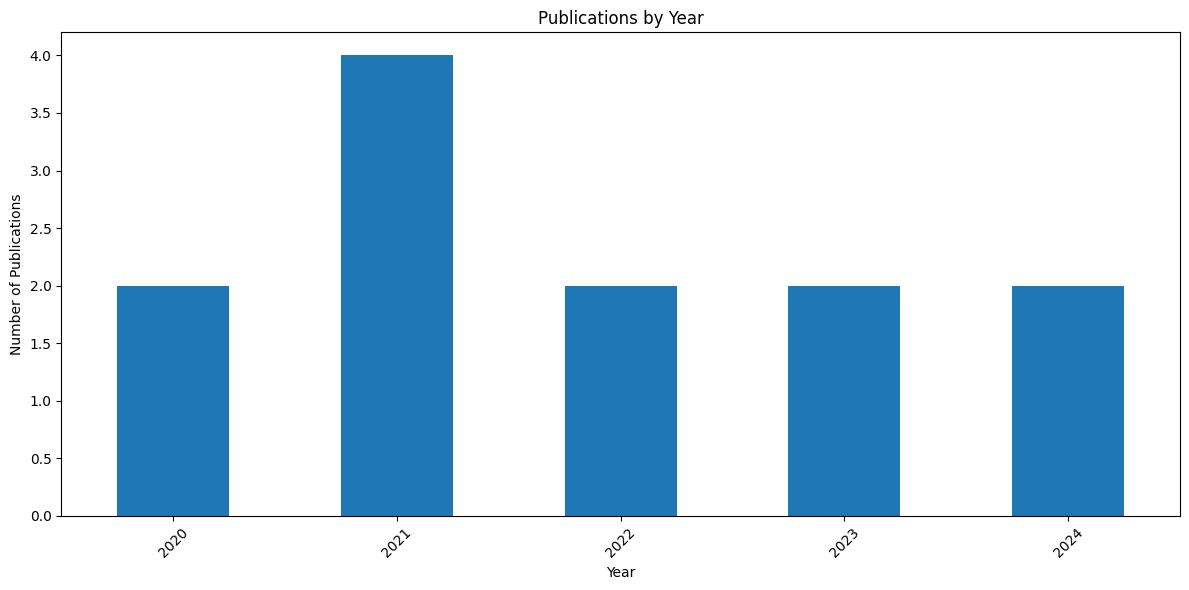


Author Information:
--------------------------------------------------
Name: Sachin D N
Scopus Author ID: 57207254227
Total Documents Published: 16
Publication year range: 2018 - 2024
Total citations: 70
--------------------------------------------------


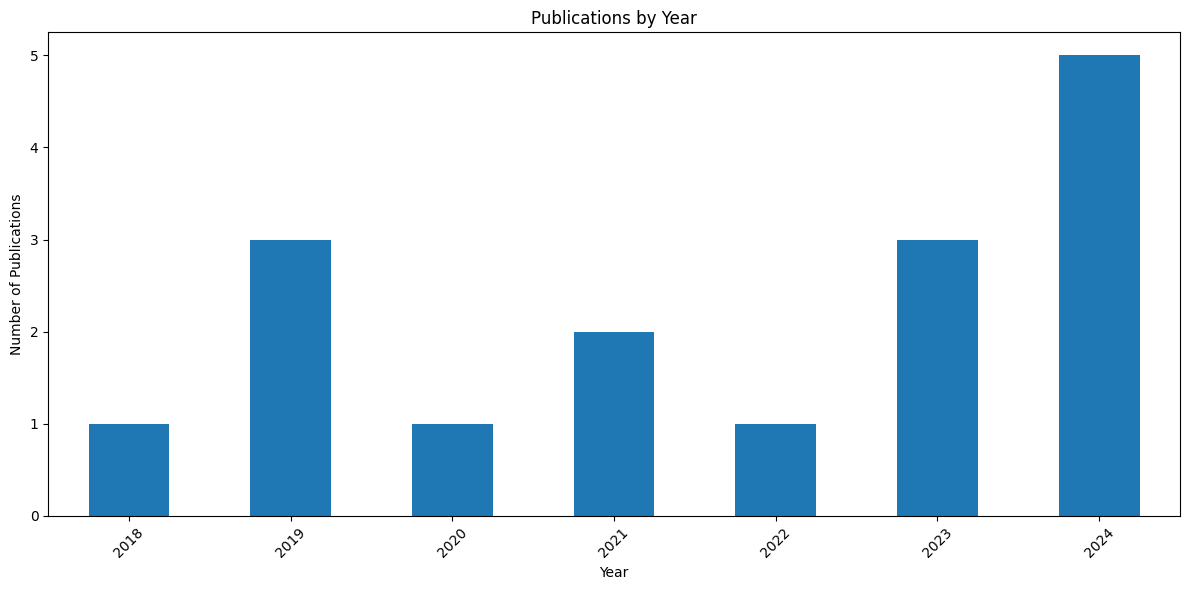


Author Information:
--------------------------------------------------
Name: Nithin Kumar
Scopus Author ID: 57209158237
Total Documents Published: 7
Publication year range: 2018 - 2024
Total citations: 42
--------------------------------------------------


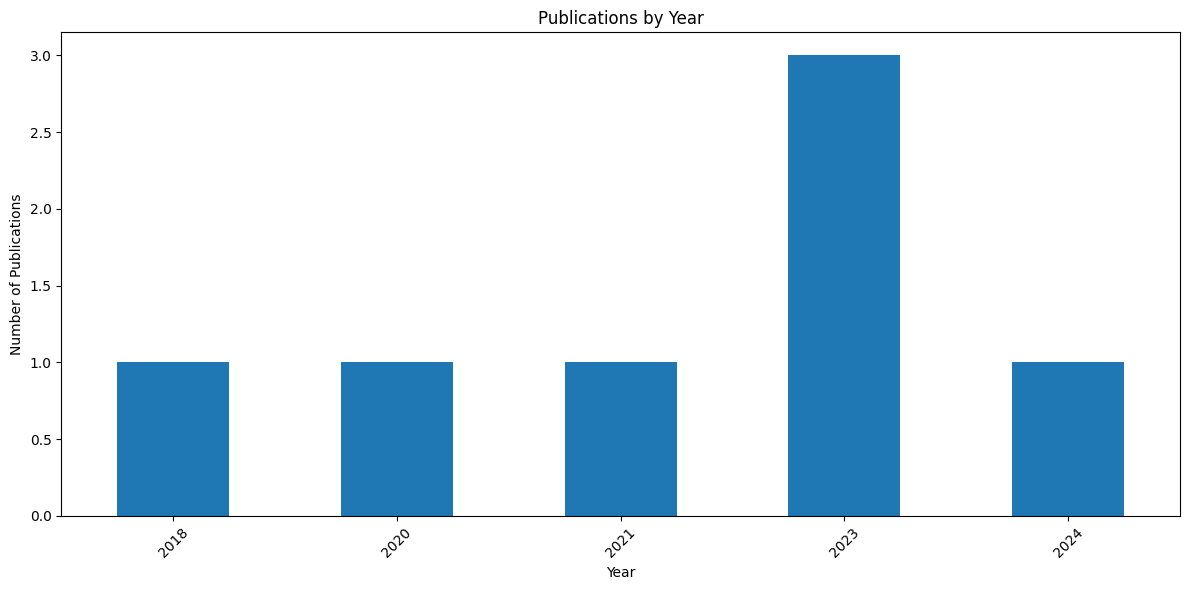


Author Information:
--------------------------------------------------
Name: Shashank N
Scopus Author ID: 57219547732
Total Documents Published: 2
Publication year range: 2021 - 2021
Total citations: 1
--------------------------------------------------


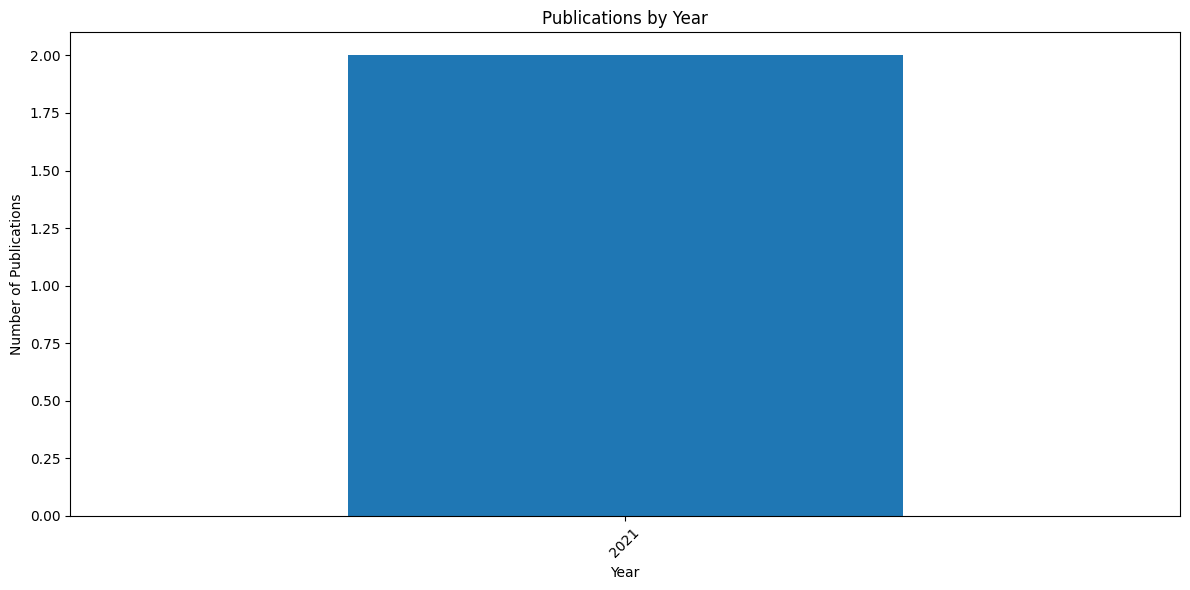


Author Information:
--------------------------------------------------
Name: Harshitha K
Scopus Author ID: 57215871380
Total Documents Published: 15
Publication year range: 2019 - 2024
Total citations: 41
--------------------------------------------------


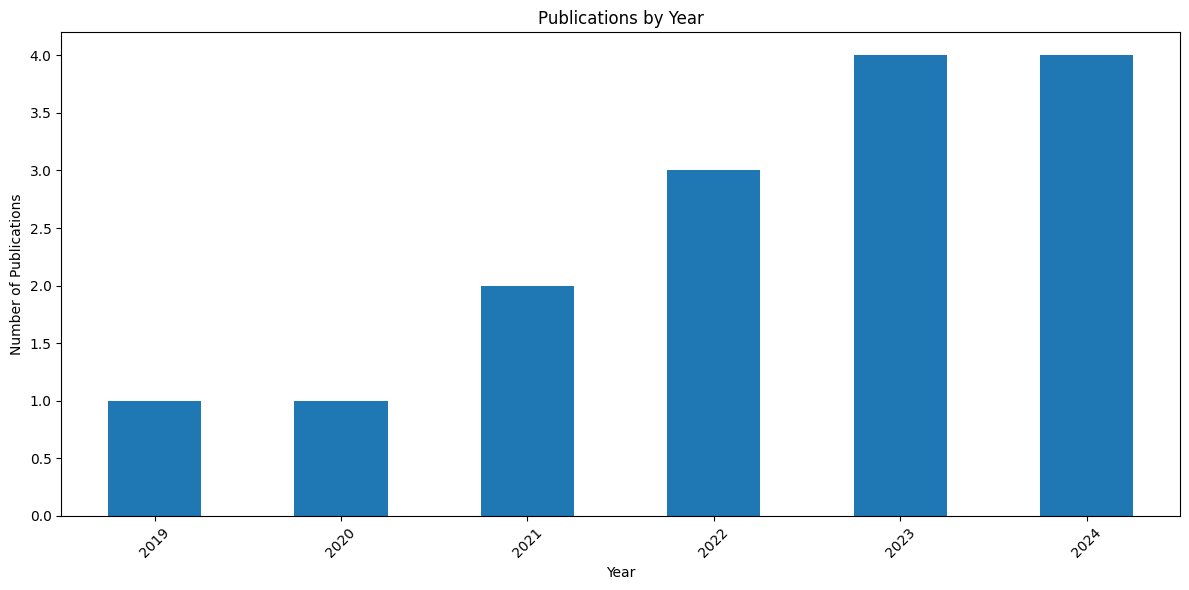


Author Information:
--------------------------------------------------
Name: Chaya Kumari H A
Scopus Author ID: 57212135510
Total Documents Published: 3
Publication year range: 2019 - 2024
Total citations: 4
--------------------------------------------------


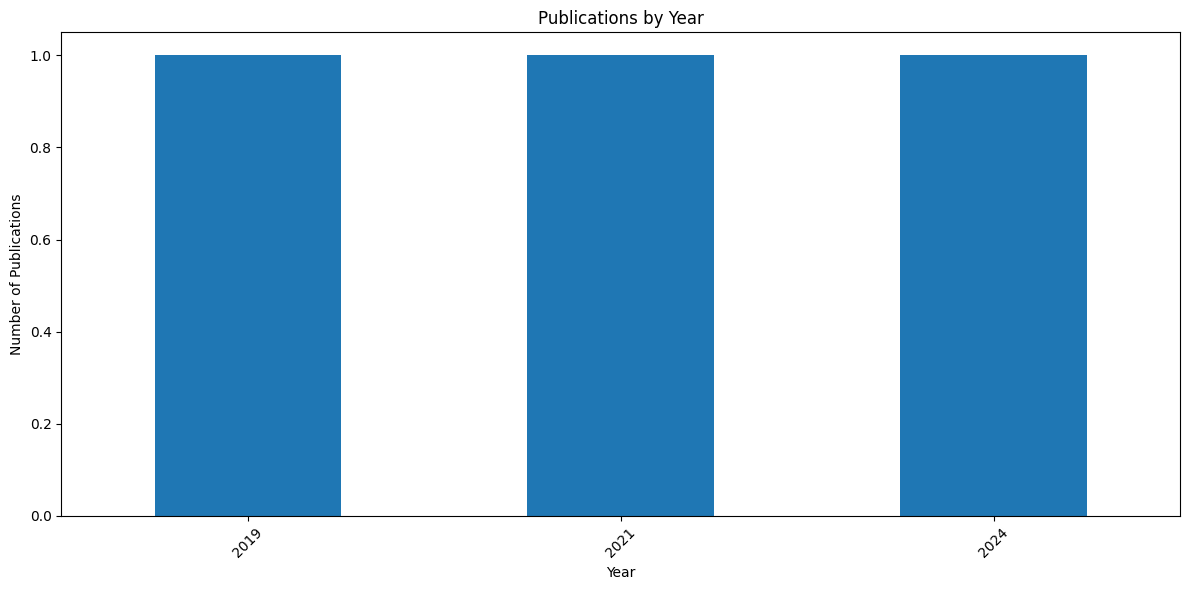


Author Information:
--------------------------------------------------
Name: Anusha K S
Scopus Author ID: 57225657708
Total Documents Published: 3
Publication year range: 2021 - 2023
Total citations: 3
--------------------------------------------------


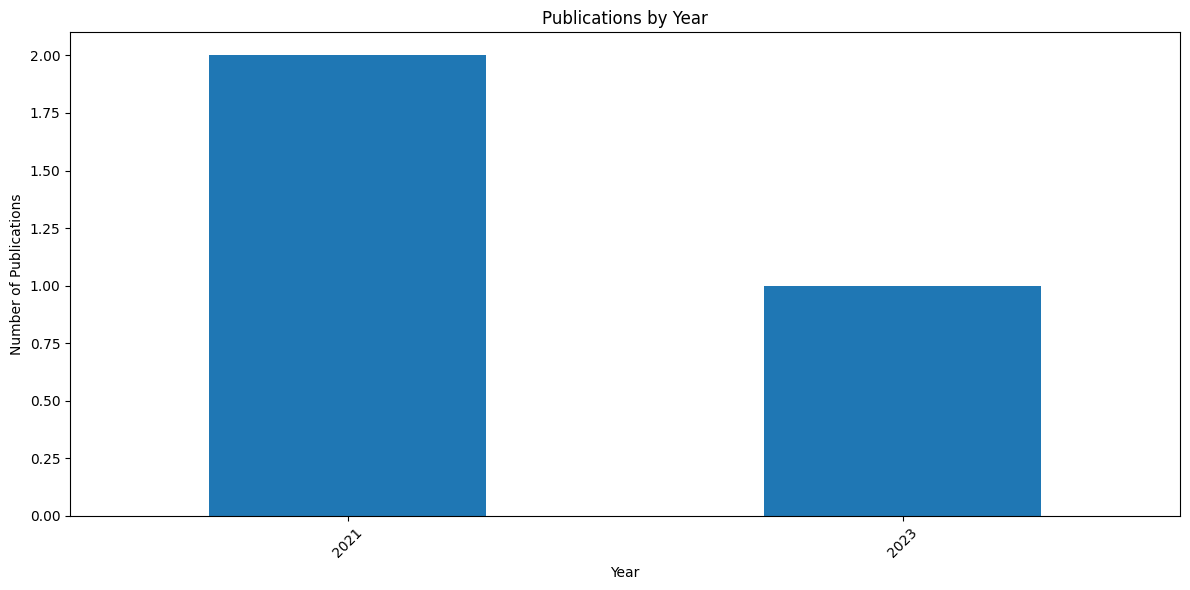


Author Information:
--------------------------------------------------
Name: Swathi B H
Scopus Author ID: 57215871749
Total Documents Published: 12
Publication year range: 2015 - 2024
Total citations: 57
--------------------------------------------------


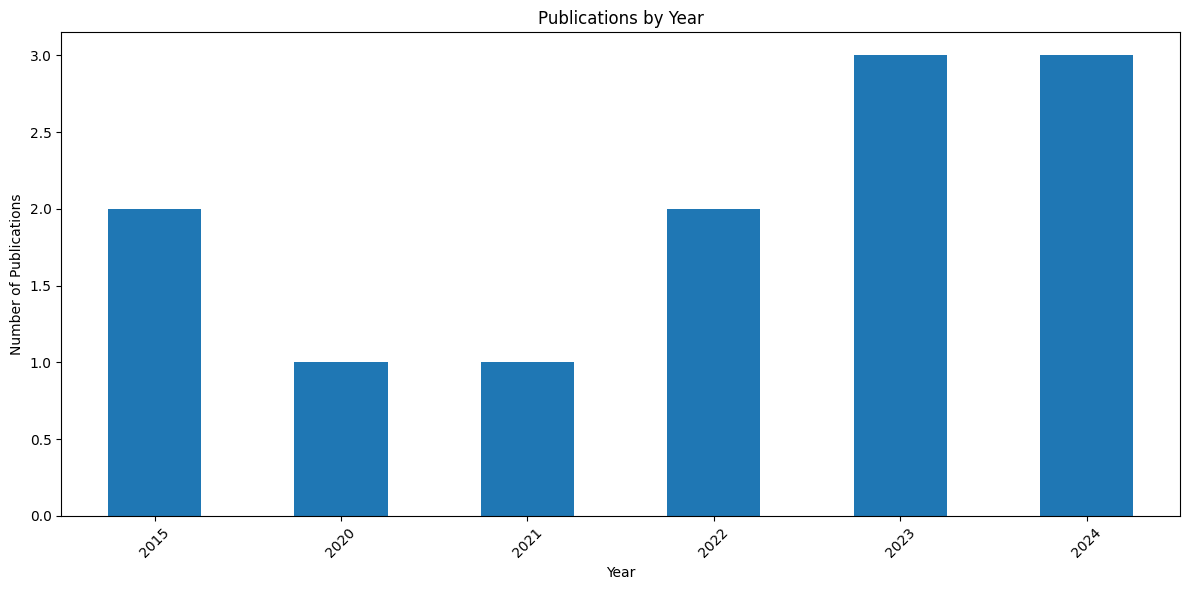


Author Information:
--------------------------------------------------
Name: Tanuja K
Scopus Author ID: 57222076412
Total Documents Published: 5
Publication year range: 2021 - 2024
Total citations: 19
--------------------------------------------------


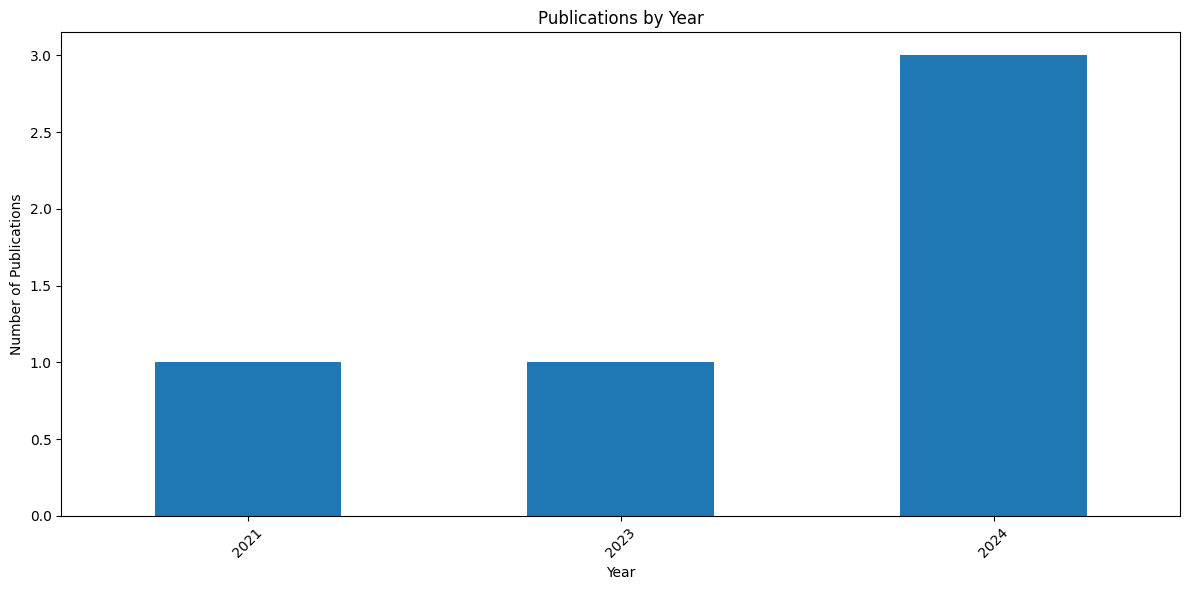


Author Information:
--------------------------------------------------
Name: Manasvi J Maasthi
Scopus Author ID: 57215872514
Total Documents Published: 3
Publication year range: 2020 - 2023
Total citations: 6
--------------------------------------------------


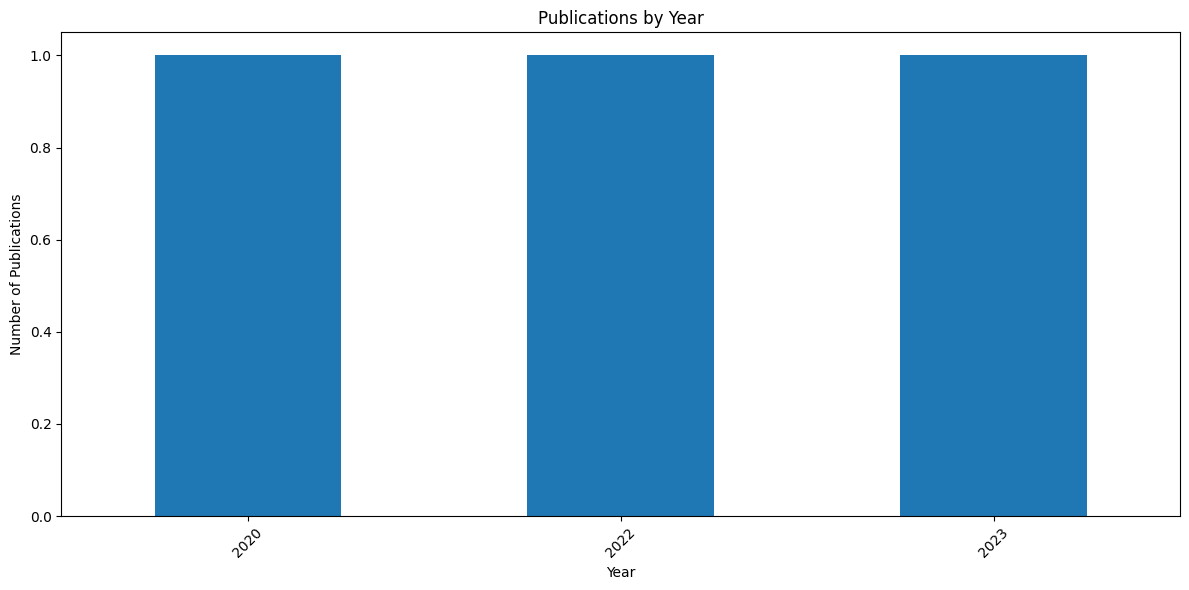


Author Information:
--------------------------------------------------
Name: Dr. Madhusudhan H S
Scopus Author ID: 57249954500
Total Documents Published: 12
Publication year range: 2021 - 2024
Total citations: 41
--------------------------------------------------


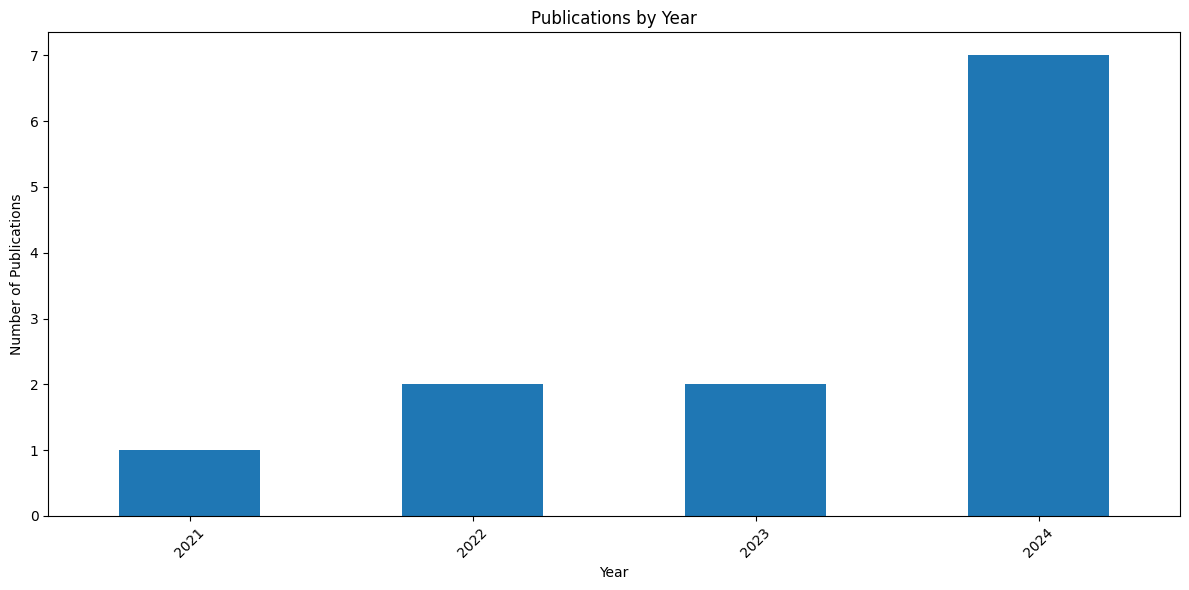


Author Information:
--------------------------------------------------
Name: Dr. Vedavathi N
Scopus Author ID: 57223995588
Total Documents Published: 10
Publication year range: 2021 - 2024
Total citations: 59
--------------------------------------------------


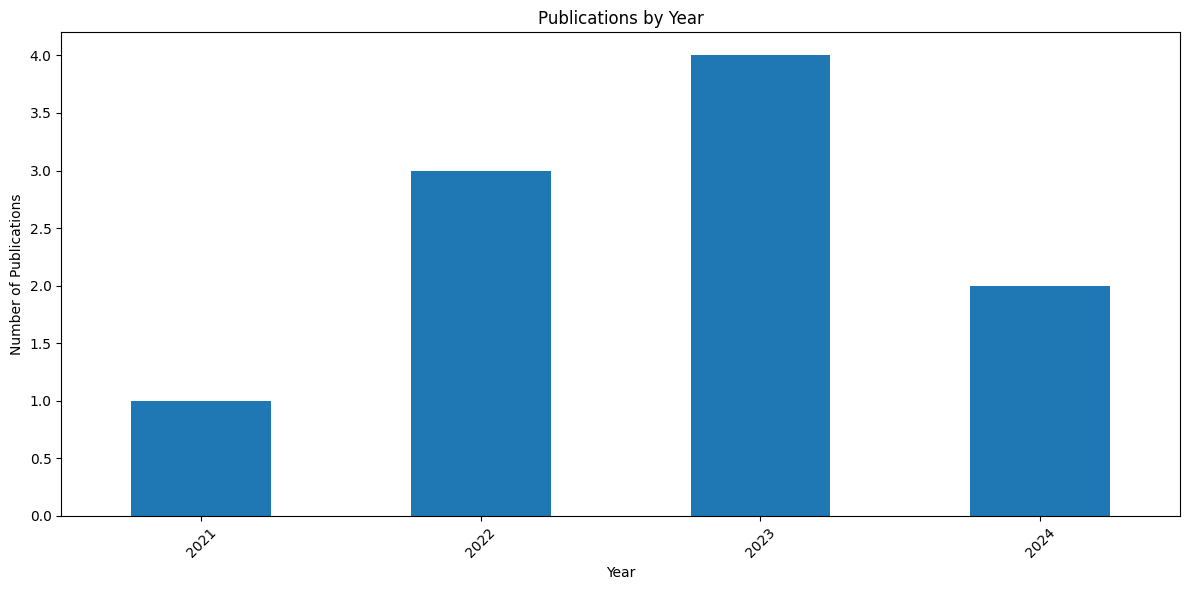


Author Information:
--------------------------------------------------
Name: Anil Kumar B H
Scopus Author ID: 58849651900
Total Documents Published: 1
Publication year range: 2024 - 2024
Total citations: 0
--------------------------------------------------


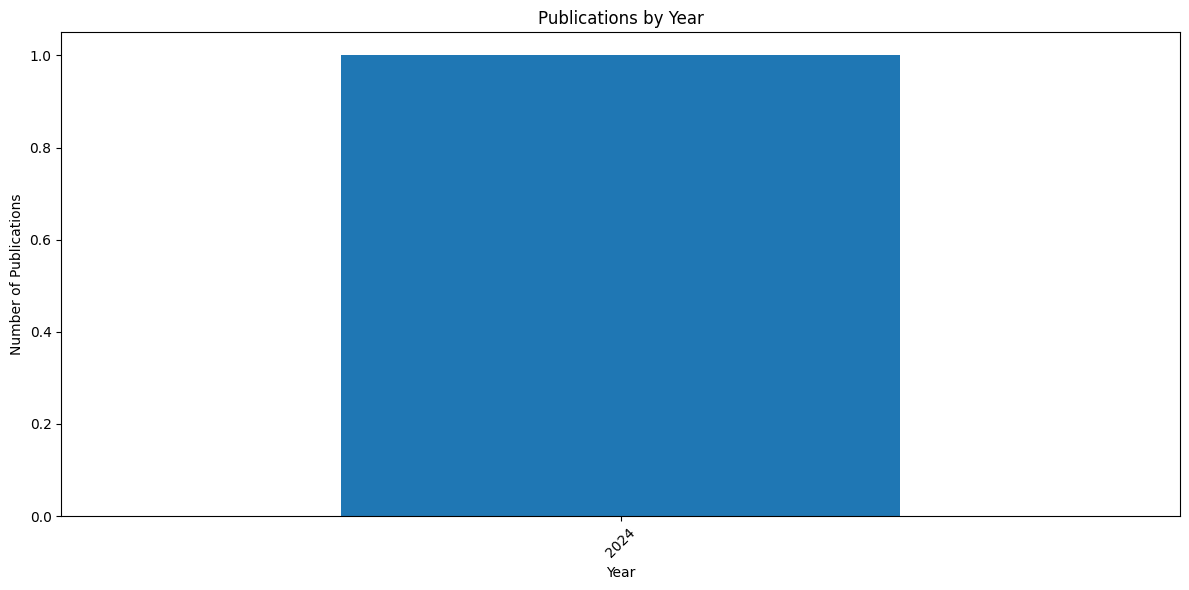

In [160]:

def main():
   # When author_list is created like: 
# author_list = list(zip(df['name'], df['Scopus_ID']))

    for id in author_list:
        if id[1]>1000:
            name = id[0]      # First element (name)
            AUTHOR_ID = id[1] # Second element (Scopus ID)
            
            API_KEY = 'c548e9190f18cce14d8d66e6ee98d677'     # Replace with your actual API key
            
            #author publications
            documents = get_documents_by_author(AUTHOR_ID, API_KEY)
            if documents:
               #graph of author publications
                authorinfo_and_visualize(name,AUTHOR_ID,API_KEY,documents)
            else:
                print("No documents found")

if __name__ == "__main__":
    main()